# ADALINE
ADALINE(ADAptive LInear NEuron) とは Perceptron と同様単層ニューラルネットワークである。Perceptron と異なるのは、連続地のコスト関数（または Loss）の定義とその最小化に関する概念が持ち込まれたことである。これにより、パラメータ更新をよりうまくやることができるようになった。具体的には、微分可能で下に凸な、重みパラメータに依存した目的関数を用意し、これを最適化（最小化）する重みパラメータを探す仕掛けを施した。この条件を満たすように決定関数を
$$
\phi (z_i) = \boldsymbol{w}^{\mathrm{T}} \boldsymbol{x}_i
$$
と変更し、目的関数として誤差平方和を用いたコスト関数
$$
J(\boldsymbol{w}) = \frac{1}{2} \sum_i (y_i - \phi(z_i))^2
$$
を定義した。代数的には $\partial J/\partial w = 0$ となる $w$ を求めることになるが、数値計算上はある規則に従って、コスト関数が最小となるパラメータを探すアルゴリズムが必要になる。パラメータ更新は以下のルールに沿って行われる。

$$
\boldsymbol{w} := \boldsymbol{w} + \Delta\boldsymbol{w}, \quad \Delta\boldsymbol{w} = - \eta \nabla J(\boldsymbol{w})
$$

ここで
$$
\begin{align}
\nabla J(\boldsymbol{w}) &= \frac{\partial J(\boldsymbol{w})}{w_j} \\
&= \frac{1}{2} \sum_i \frac{\partial}{\partial w_j} (y_i - \phi(z_i))^2 \\
&= - \sum_i (y_i - \phi(z_i))x_j^i
\end{align}
$$
となるので、結局
$$
\boldsymbol{w} := \boldsymbol{w} + \eta \sum_i (y_i - \phi(z_i))\boldsymbol{x}^i
$$
によって更新される。

すべてのデータにわたって和をとるということは、更新のたびに全データを使って評価していることになる。これはバッチ勾配降下法と呼ばれる。これに対し、1つのデータを使って更新するやり方を確率的勾配降下法（や逐次勾配降下法、オンライン勾配降下法など）と呼ばれる。また一部のサブセットを使って更新するやり方をミニバッチ勾配降下法という。

# 実装と実験

データの取得

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from adaline import AdalineGD, AdalineSGD

In [2]:
s = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
print('URL:', s)

df = pd.read_csv(s,
                 header=None,
                 encoding='utf-8')

df.tail()

URL: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data


,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [3]:
# select setosa and versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

# extract sepal length and petal length
X = df.iloc[0:100, [0, 2]].values

Text(0.5, 1.0, 'Adaline - Learning rate 0.0001')

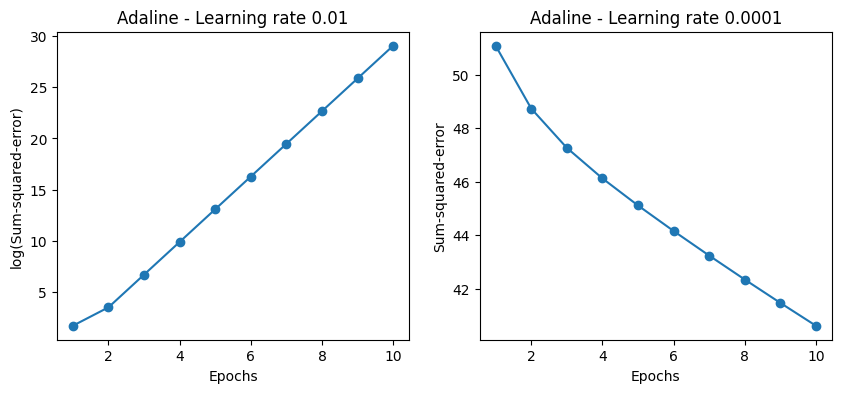

In [4]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

ada1 = AdalineGD(n_iter=10, eta=0.01).fit(X, y)
ax[0].plot(range(1, len(ada1.cost_) + 1), np.log10(ada1.cost_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline - Learning rate 0.01')

ada2 = AdalineGD(n_iter=10, eta=0.0001).fit(X, y)
ax[1].plot(range(1, len(ada2.cost_) + 1), ada2.cost_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline - Learning rate 0.0001')

In [5]:
# standardize features
# 大きい学習率でも収束する
X_std = np.copy(X)
X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()

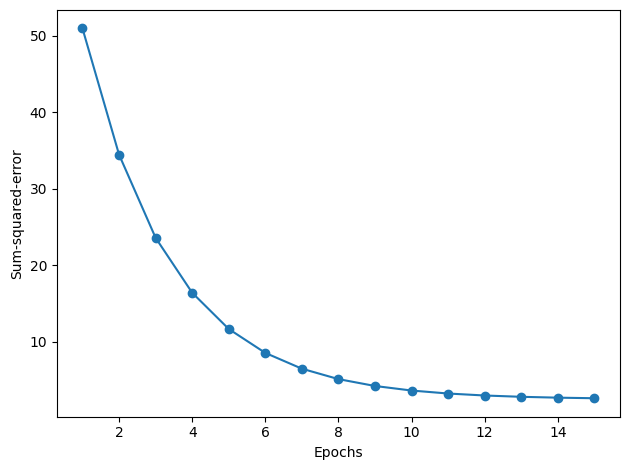

In [6]:
ada_gd = AdalineGD(n_iter=15, eta=0.01)
ada_gd.fit(X_std, y)

plt.plot(range(1, len(ada_gd.cost_) + 1), ada_gd.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')

plt.tight_layout()
# plt.savefig('images/02_14_2.png', dpi=300)
plt.show()

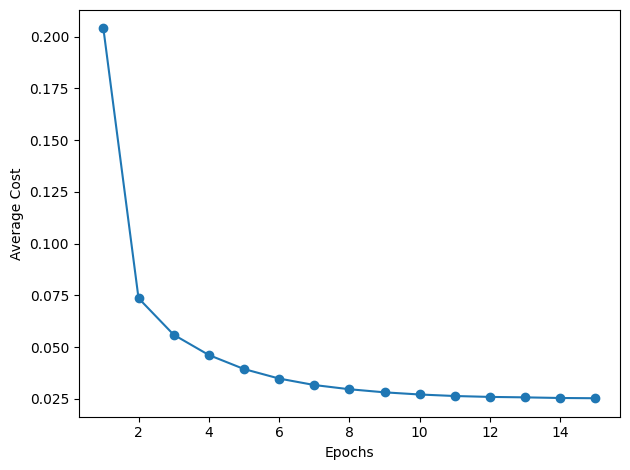

In [7]:
# 確率的勾配降下法
ada_sgd = AdalineSGD(n_iter=15, eta=0.01, random_state=1)
ada_sgd.fit(X_std, y)

plt.plot(range(1, len(ada_sgd.cost_) + 1), ada_sgd.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Average Cost')

plt.tight_layout()
# plt.savefig('images/02_15_2.png', dpi=300)
plt.show()

In [8]:
# online 学習する際には partial_fit を用いる
ada_sgd.partial_fit(X_std[0, :], y[0])